# PyCaret 2 Classification Example
This notebook is created using PyCaret 2.0. Last updated : 31-07-2020

In [1]:
# check version
from pycaret.utils import version
version()

'2.3.10'

# 1. Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/home/thu/INT3041E_AI_PM2.5-Concentration-Estimation/data/add_AQI.csv')
data

,time,ID,pm25,lat,lon,SQRT_SEA_DEM_LAT,WSPD,WDIR,TMP,TX,...,NDVI,CO,HCHO,NO2,SO2,CLOUD,O3,AAI,AQI,AQI_Class
0,2020-01-01,19,116.949130,21.049750,105.741870,5.922647,1.136119,145.942749,20.811243,23.219995,...,0.000551,0.045586,0.000060,0.000072,0.000035,0.711612,0.101653,-0.836203,183,3
1,2020-01-01,79,105.103044,21.015250,105.800130,4.307231,1.136119,145.942749,20.811243,23.219995,...,-0.003006,0.041913,0.000107,0.000086,0.000056,0.761720,0.103635,-0.718537,177,3
2,2020-01-01,163,118.285100,21.024347,106.017288,4.988467,0.651509,145.395233,20.677492,23.029993,...,0.004388,0.042329,0.000108,0.000071,0.000026,0.867689,0.102144,-0.942304,183,3
3,2020-01-01,300,116.739130,21.023532,105.853941,4.865087,1.136119,145.942749,20.811243,23.219995,...,-0.001733,0.041913,0.000097,0.000085,0.000079,0.779294,0.102875,-0.692613,183,3
4,2020-01-02,19,76.856667,21.049750,105.741870,5.922647,2.744283,147.084442,22.176249,25.119989,...,0.016035,0.042298,0.000115,0.000082,-0.000345,0.705396,0.103488,-1.119681,162,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11503,2021-12-31,163,16.154054,21.024347,106.017288,4.988467,1.669253,22.916901,16.846243,18.989985,...,-0.002742,0.044463,0.000133,0.000080,0.000107,1.000000,0.113309,-0.477924,60,1
11504,2021-12-31,172,17.153631,20.927000,106.314000,4.784339,1.322285,353.486359,17.187494,18.839991,...,0.001342,0.047781,0.000043,0.000096,0.000121,1.000000,0.113023,-0.511212,62,1
11505,2021-12-31,173,11.901323,20.977400,106.430800,4.589203,0.235641,347.438232,17.732492,19.739985,...,0.010294,0.047366,0.000045,0.000073,0.000172,1.000000,0.112750,-0.629895,50,0
11506,2021-12-31,195,24.209832,21.338470,105.367300,5.228505,1.295622,97.865257,16.122246,17.824003,...,-0.003163,0.049873,0.000110,0.000077,0.000105,1.000000,0.112451,-0.337096,76,1


In [4]:
def aqi_bucket(aqi):
    if aqi <= 50: return 'Good'
    elif aqi <= 100: return 'Moderate'
    elif aqi <= 150: return 'Unhealthy for Sensitive'
    elif aqi <= 200: return 'Unhealthy'
    elif aqi <= 300: return 'Very Unhealthy'
    else: return 'Hazardous'

In [5]:
# Tính toán AQI và phân loại thành bucket
data['AQI_Bucket'] = data['AQI'].apply(aqi_bucket)
data

,time,ID,pm25,lat,lon,SQRT_SEA_DEM_LAT,WSPD,WDIR,TMP,TX,...,CO,HCHO,NO2,SO2,CLOUD,O3,AAI,AQI,AQI_Class,AQI_Bucket
0,2020-01-01,19,116.949130,21.049750,105.741870,5.922647,1.136119,145.942749,20.811243,23.219995,...,0.045586,0.000060,0.000072,0.000035,0.711612,0.101653,-0.836203,183,3,Unhealthy
1,2020-01-01,79,105.103044,21.015250,105.800130,4.307231,1.136119,145.942749,20.811243,23.219995,...,0.041913,0.000107,0.000086,0.000056,0.761720,0.103635,-0.718537,177,3,Unhealthy
2,2020-01-01,163,118.285100,21.024347,106.017288,4.988467,0.651509,145.395233,20.677492,23.029993,...,0.042329,0.000108,0.000071,0.000026,0.867689,0.102144,-0.942304,183,3,Unhealthy
3,2020-01-01,300,116.739130,21.023532,105.853941,4.865087,1.136119,145.942749,20.811243,23.219995,...,0.041913,0.000097,0.000085,0.000079,0.779294,0.102875,-0.692613,183,3,Unhealthy
4,2020-01-02,19,76.856667,21.049750,105.741870,5.922647,2.744283,147.084442,22.176249,25.119989,...,0.042298,0.000115,0.000082,-0.000345,0.705396,0.103488,-1.119681,162,3,Unhealthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11503,2021-12-31,163,16.154054,21.024347,106.017288,4.988467,1.669253,22.916901,16.846243,18.989985,...,0.044463,0.000133,0.000080,0.000107,1.000000,0.113309,-0.477924,60,1,Moderate
11504,2021-12-31,172,17.153631,20.927000,106.314000,4.784339,1.322285,353.486359,17.187494,18.839991,...,0.047781,0.000043,0.000096,0.000121,1.000000,0.113023,-0.511212,62,1,Moderate
11505,2021-12-31,173,11.901323,20.977400,106.430800,4.589203,0.235641,347.438232,17.732492,19.739985,...,0.047366,0.000045,0.000073,0.000172,1.000000,0.112750,-0.629895,50,0,Good
11506,2021-12-31,195,24.209832,21.338470,105.367300,5.228505,1.295622,97.865257,16.122246,17.824003,...,0.049873,0.000110,0.000077,0.000105,1.000000,0.112451,-0.337096,76,1,Moderate


In [6]:
counts = data['AQI_Bucket'].value_counts()
counts

Moderate                   5649
Unhealthy for Sensitive    2186
Unhealthy                  1814
Good                       1701
Very Unhealthy              110
Hazardous                    48
Name: AQI_Bucket, dtype: int64

In [7]:
data = data.drop(columns=['time', 'ID', 'pm25', 'AQI', 'AQI_Class'])
data

,lat,lon,SQRT_SEA_DEM_LAT,WSPD,WDIR,TMP,TX,TN,TP,RH,PRES2M,NDVI,CO,HCHO,NO2,SO2,CLOUD,O3,AAI,AQI_Bucket
0,21.049750,105.741870,5.922647,1.136119,145.942749,20.811243,23.219995,18.939997,0.3750,74.750000,102197.203125,0.000551,0.045586,0.000060,0.000072,0.000035,0.711612,0.101653,-0.836203,Unhealthy
1,21.015250,105.800130,4.307231,1.136119,145.942749,20.811243,23.219995,18.939997,0.3750,74.750000,102197.203125,-0.003006,0.041913,0.000107,0.000086,0.000056,0.761720,0.103635,-0.718537,Unhealthy
2,21.024347,106.017288,4.988467,0.651509,145.395233,20.677492,23.029993,18.879999,0.1250,73.687500,102228.796875,0.004388,0.042329,0.000108,0.000071,0.000026,0.867689,0.102144,-0.942304,Unhealthy
3,21.023532,105.853941,4.865087,1.136119,145.942749,20.811243,23.219995,18.939997,0.3750,74.750000,102197.203125,-0.001733,0.041913,0.000097,0.000085,0.000079,0.779294,0.102875,-0.692613,Unhealthy
4,21.049750,105.741870,5.922647,2.744283,147.084442,22.176249,25.119989,20.299982,0.1875,78.012497,102025.328125,0.016035,0.042298,0.000115,0.000082,-0.000345,0.705396,0.103488,-1.119681,Unhealthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11503,21.024347,106.017288,4.988467,1.669253,22.916901,16.846243,18.989985,14.730005,0.0625,65.837502,102317.015625,-0.002742,0.044463,0.000133,0.000080,0.000107,1.000000,0.113309,-0.477924,Moderate
11504,20.927000,106.314000,4.784339,1.322285,353.486359,17.187494,18.839991,15.249994,0.0000,63.812500,102335.617188,0.001342,0.047781,0.000043,0.000096,0.000121,1.000000,0.113023,-0.511212,Moderate
11505,20.977400,106.430800,4.589203,0.235641,347.438232,17.732492,19.739985,15.609980,0.0000,65.050003,102115.812500,0.010294,0.047366,0.000045,0.000073,0.000172,1.000000,0.112750,-0.629895,Good
11506,21.338470,105.367300,5.228505,1.295622,97.865257,16.122246,17.824003,14.982986,0.0000,70.632500,101743.898438,-0.003163,0.049873,0.000110,0.000077,0.000105,1.000000,0.112451,-0.337096,Moderate


# 2. Initialize Setup

In [8]:
from pycaret.classification import *

/home/thu/miniconda3/envs/pycaret/lib/python3.6/site-packages/pycaret/loggers/mlflow_logger.py:14: FutureWarning: MLflow support for Python 3.6 is deprecated and will be dropped in an upcoming release. At that point, existing Python 3.6 workflows that use MLflow will continue to work without modification, but Python 3.6 users will no longer get access to the latest MLflow features and bugfixes. We recommend that you upgrade to Python 3.7 or newer.
  import mlflow


In [9]:
# Step 1: Encode the ordinal target variable
ordinal_mapping = {
    'Good': 0,
    'Moderate': 1,
    'Unhealthy for Sensitive': 2,
    'Unhealthy': 3,
    'Very Unhealthy': 4,
    'Hazardous': 5
}

data['AQI_Bucket'] = data['AQI_Bucket'].map(ordinal_mapping)

# Step 2: Setup PyCaret for ordinal classification
from pycaret.classification import *

clf1 = setup(data=data, session_id=123, target='AQI_Bucket', silent=True, fold_strategy='kfold', fold=5)

,Description,Value
0,session_id,123
1,Target,AQI_Bucket
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(11508, 20)"
5,Missing Values,False
6,Numeric Features,19
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


# 3. Compare Baseline

In [10]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.6833,0.8652,0.4445,0.6717,0.6705,0.5093,0.5147,638.8620
rf,Random Forest Classifier,0.6829,0.8621,0.4391,0.6724,0.6673,0.5031,0.5116,1.9200
et,Extra Trees Classifier,0.6756,0.8576,0.4521,0.6665,0.6608,0.4921,0.5004,1.3520
gbc,Gradient Boosting Classifier,0.6502,0.8366,0.4166,0.6393,0.6268,0.4440,0.4580,55.1980
dt,Decision Tree Classifier,0.5821,0.6930,0.4178,0.5875,0.5841,0.3850,0.3854,0.4580
lda,Linear Discriminant Analysis,0.5611,0.7512,0.2965,0.5287,0.5161,0.2824,0.3007,0.1380
ridge,Ridge Classifier,0.5261,0.0000,0.2327,0.4586,0.4203,0.1606,0.2066,0.0500
qda,Quadratic Discriminant Analysis,0.5223,0.7597,0.4359,0.5499,0.5283,0.3220,0.3257,0.0980
knn,K Neighbors Classifier,0.5213,0.6993,0.3066,0.4945,0.4994,0.2426,0.2480,4.0780
dummy,Dummy Classifier,0.4915,0.5000,0.1667,0.2416,0.3240,0.0000,0.0000,0.0260


# 4. Create Model

In [11]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5773,0.6874,0.4220,0.5784,0.5775,0.3767,0.3768
1,0.5822,0.6932,0.3764,0.5861,0.5840,0.3829,0.3830
2,0.5841,0.6907,0.4461,0.5837,0.5827,0.3852,0.3856
3,0.5847,0.6966,0.4266,0.5915,0.5876,0.3934,0.3936
4,0.5822,0.6969,0.4179,0.5980,0.5885,0.3869,0.3880
Mean,0.5821,0.6930,0.4178,0.5875,0.5841,0.3850,0.3854
Std,0.0026,0.0036,0.0228,0.0067,0.0039,0.0054,0.0056


In [12]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6375,0.8262,0.3961,0.6203,0.6060,0.4181,0.4372
1,0.6468,0.8308,0.4142,0.6339,0.6270,0.4443,0.4546
2,0.6282,0.8292,0.3932,0.6208,0.6002,0.4097,0.4262
3,0.6735,0.8518,0.4333,0.6637,0.6551,0.4889,0.4998
4,0.6648,0.8449,0.4463,0.6580,0.6459,0.4591,0.4725
Mean,0.6502,0.8366,0.4166,0.6393,0.6268,0.4440,0.4580
Std,0.0168,0.0100,0.0206,0.0183,0.0215,0.0286,0.0261


In [13]:
rf = create_model('rf', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6710,0.8524,0.4316,0.6569,0.6511,0.4828,0.4937
1,0.7020,0.8697,0.4393,0.6907,0.6903,0.5363,0.5417
2,0.6667,0.8482,0.4185,0.6580,0.6440,0.4750,0.4882
3,0.6952,0.8715,0.4729,0.6834,0.6831,0.5296,0.5355
4,0.6797,0.8685,0.4333,0.6729,0.6680,0.4917,0.4988
Mean,0.6829,0.8621,0.4391,0.6724,0.6673,0.5031,0.5116
Std,0.0137,0.0097,0.0182,0.0134,0.0178,0.0250,0.0224


In [14]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4860,0.6699,0.1972,0.4223,0.3744,0.0758,0.1058
1,0.4836,0.6651,0.1953,0.3548,0.3724,0.0697,0.0945
2,0.4836,0.6680,0.1926,0.3408,0.3598,0.0613,0.0920
3,0.4904,0.6730,0.1968,0.4784,0.3773,0.0741,0.1090
4,0.5047,0.6630,0.2020,0.5266,0.3973,0.0875,0.1197
Mean,0.4896,0.6678,0.1968,0.4246,0.3762,0.0737,0.1042
Std,0.0079,0.0035,0.0031,0.0710,0.0121,0.0085,0.0101


In [15]:
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6679,0.8496,0.4381,0.6551,0.6485,0.4774,0.4886
1,0.6840,0.8641,0.4224,0.6709,0.6699,0.5061,0.5128
2,0.6598,0.8449,0.4421,0.6498,0.6375,0.4655,0.4780
3,0.6872,0.8658,0.5063,0.6801,0.6788,0.5195,0.5239
4,0.6791,0.8637,0.4516,0.6764,0.6694,0.4919,0.4986
Mean,0.6756,0.8576,0.4521,0.6665,0.6608,0.4921,0.5004
Std,0.0102,0.0086,0.0287,0.0119,0.0153,0.0193,0.0165


In [16]:
qda = create_model('qda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5109,0.7528,0.4109,0.5303,0.5164,0.3035,0.3053
1,0.5127,0.7626,0.4235,0.5456,0.5198,0.3141,0.3189
2,0.5096,0.7509,0.4149,0.5367,0.5147,0.3009,0.3042
3,0.5388,0.7665,0.4841,0.5745,0.5474,0.3552,0.3601
4,0.5394,0.7655,0.4460,0.5621,0.5433,0.3365,0.3402
Mean,0.5223,0.7597,0.4359,0.5499,0.5283,0.3220,0.3257
Std,0.0138,0.0065,0.0270,0.0163,0.0141,0.0208,0.0215


In [17]:
ada = create_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.3681,0.5969,0.3045,0.4704,0.3909,0.1818,0.1942
1,0.4165,0.5775,0.2507,0.4932,0.4389,0.1873,0.1942
2,0.3414,0.5983,0.2577,0.4485,0.3684,0.1219,0.1282
3,0.2464,0.6186,0.2568,0.4444,0.2769,0.1165,0.1394
4,0.5456,0.5640,0.3338,0.5297,0.5157,0.2779,0.2872
Mean,0.3836,0.5910,0.2807,0.4772,0.3982,0.1771,0.1886
Std,0.0982,0.0188,0.0328,0.0315,0.0789,0.0583,0.0563


In [18]:
nb = create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4687,0.6967,0.3588,0.4849,0.4575,0.2309,0.2379
1,0.4761,0.7050,0.3368,0.5091,0.4635,0.2467,0.2589
2,0.4742,0.6958,0.3788,0.4944,0.4512,0.2402,0.2528
3,0.4854,0.7130,0.3298,0.5055,0.4737,0.2603,0.2699
4,0.4904,0.7157,0.3876,0.5159,0.4801,0.2549,0.2636
Mean,0.4790,0.7052,0.3583,0.5020,0.4652,0.2466,0.2566
Std,0.0079,0.0081,0.0226,0.0110,0.0105,0.0104,0.0109


In [19]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5282,0.7042,0.3128,0.4967,0.5003,0.2478,0.2561
1,0.5289,0.7012,0.3270,0.5049,0.5084,0.2524,0.2579
2,0.5196,0.6926,0.2889,0.4877,0.4949,0.2418,0.2475
3,0.5102,0.7035,0.3122,0.4880,0.4924,0.2353,0.2394
4,0.5196,0.6950,0.2919,0.4953,0.5008,0.2354,0.2392
Mean,0.5213,0.6993,0.3066,0.4945,0.4994,0.2426,0.2480
Std,0.0068,0.0047,0.0143,0.0064,0.0055,0.0068,0.0080


In [41]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6673,0.8554,0.4187,0.6515,0.6501,0.4836,0.4903
1,0.6828,0.8705,0.4415,0.6697,0.6706,0.5086,0.5132
2,0.6760,0.8570,0.4629,0.6643,0.6599,0.4987,0.5062
3,0.7076,0.8762,0.4580,0.6963,0.6988,0.5549,0.5577
4,0.6828,0.8669,0.4413,0.6768,0.6730,0.5010,0.5063
Mean,0.6833,0.8652,0.4445,0.6717,0.6705,0.5093,0.5147
Std,0.0134,0.0080,0.0155,0.0148,0.0164,0.0242,0.0228


In [20]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [21]:
models(type='ensemble').index.tolist()

['rf', 'ada', 'gbc', 'et', 'lightgbm']

In [22]:
try:
    ensembled_models = compare_models(include=models(type='ensemble').index.tolist(), fold=3)
except Exception as e:
    with open("error_log.txt", "w") as f:
        f.write(str(e))
    print("An error occurred. Details have been saved to error_log.txt.")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.6814,0.8565,0.4606,0.6703,0.6688,0.5066,0.5122,212.5000
rf,Random Forest Classifier,0.6726,0.8528,0.4341,0.6635,0.6552,0.4844,0.4946,1.0167
et,Extra Trees Classifier,0.6711,0.8487,0.4446,0.6601,0.6547,0.4842,0.4930,0.7733
gbc,Gradient Boosting Classifier,0.6456,0.8332,0.4161,0.6318,0.6208,0.4359,0.4501,15.2700
ada,Ada Boost Classifier,0.3762,0.6075,0.3258,0.4598,0.3906,0.1637,0.1741,0.7067


# 5. Tune Hyperparameters

In [23]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4885,0.6653,0.1916,0.4310,0.3658,0.0674,0.1009
1,0.4860,0.6630,0.1917,0.3883,0.3709,0.0689,0.0946
2,0.4836,0.6685,0.1997,0.3429,0.3669,0.0776,0.1070
3,0.4922,0.6621,0.1993,0.5171,0.3905,0.0887,0.1206
4,0.5034,0.6702,0.1990,0.3934,0.3913,0.0754,0.1094
Mean,0.4908,0.6658,0.1963,0.4145,0.3771,0.0756,0.1065
Std,0.0070,0.0031,0.0038,0.0584,0.0114,0.0076,0.0087


In [24]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5754,0.7560,0.3147,0.5561,0.5436,0.3157,0.3296
1,0.5847,0.7614,0.3118,0.5600,0.5375,0.3127,0.3367
2,0.5723,0.7451,0.3120,0.5459,0.5189,0.3003,0.3244
3,0.5922,0.7633,0.3158,0.5728,0.5495,0.3351,0.3565
4,0.6077,0.7724,0.3347,0.6098,0.5837,0.3598,0.3733
Mean,0.5865,0.7596,0.3178,0.5689,0.5466,0.3247,0.3441
Std,0.0127,0.0090,0.0086,0.0222,0.0212,0.0208,0.0182


In [25]:
tuned_gbc = tune_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6598,0.8455,0.4150,0.6468,0.6440,0.4706,0.4785
1,0.6828,0.8579,0.4545,0.6782,0.6769,0.5153,0.5180
2,0.6642,0.8505,0.4723,0.6566,0.6480,0.4801,0.4887
3,0.6971,0.8649,0.4880,0.6896,0.6908,0.5406,0.5429
4,0.6803,0.8555,0.4440,0.6812,0.6759,0.5022,0.5059
Mean,0.6768,0.8549,0.4548,0.6705,0.6671,0.5018,0.5068
Std,0.0135,0.0066,0.0249,0.0161,0.0181,0.0250,0.0226


In [ ]:
tuned_lightgbm = tune_model(lightgbm)
tuned_et = tune_model(et)

# 6. Ensemble Model

In [26]:
bagged_dt = ensemble_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6524,0.8238,0.4532,0.6383,0.6397,0.4639,0.4688
1,0.6642,0.8313,0.4504,0.6509,0.6545,0.4851,0.4876
2,0.6474,0.8157,0.4405,0.6335,0.6325,0.4527,0.4593
3,0.6561,0.8291,0.4438,0.6473,0.6491,0.4799,0.4816
4,0.6629,0.8312,0.4301,0.6537,0.6546,0.4746,0.4776
Mean,0.6566,0.8262,0.4436,0.6447,0.6461,0.4713,0.4750
Std,0.0063,0.0059,0.0081,0.0076,0.0087,0.0116,0.0099


In [27]:
boosted_dt = ensemble_model(dt, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5822,0.6889,0.3978,0.5795,0.5806,0.3806,0.3807
1,0.5729,0.6855,0.3781,0.5752,0.5740,0.3682,0.3682
2,0.5891,0.6950,0.4354,0.5895,0.5887,0.3944,0.3947
3,0.5916,0.7005,0.4279,0.5965,0.5937,0.4009,0.4011
4,0.5841,0.6927,0.4140,0.5943,0.5885,0.3828,0.3832
Mean,0.5840,0.6925,0.4106,0.5870,0.5851,0.3854,0.3856
Std,0.0065,0.0051,0.0207,0.0083,0.0070,0.0114,0.0114


In [ ]:
bagged_lightgbm = ensemble_model(lightgbm)
boosted_lightgbm = ensemble_model(lightgbm, method = 'Boosting')

# 7. Blend Models

In [28]:
blender = blend_models(estimator_list = [boosted_dt, bagged_dt, tuned_rf], method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6207,0.8228,0.4068,0.6085,0.6126,0.4260,0.4274
1,0.6071,0.8289,0.3913,0.5969,0.6006,0.4046,0.4056
2,0.6238,0.8221,0.4480,0.6163,0.6172,0.4327,0.4343
3,0.6300,0.8316,0.4421,0.6246,0.6264,0.4449,0.4456
4,0.6195,0.8365,0.4237,0.6162,0.6167,0.4196,0.4203
Mean,0.6202,0.8284,0.4224,0.6125,0.6147,0.4256,0.4266
Std,0.0075,0.0054,0.0212,0.0093,0.0084,0.0134,0.0134


In [ ]:
blender = blend_models(estimator_list = [boosted_lightgbm, bagged_lightgbm, tuned_rf], method = 'soft')

# 8. Stack Models

In [29]:
stacker = stack_models(estimator_list = [boosted_dt,bagged_dt,tuned_rf], meta_model=rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6648,0.8449,0.4231,0.6498,0.6475,0.4772,0.4852
1,0.6716,0.8514,0.4301,0.6558,0.6558,0.4878,0.4943
2,0.6431,0.8384,0.3918,0.6262,0.6160,0.4365,0.4499
3,0.6921,0.8609,0.4586,0.6820,0.6820,0.5273,0.5316
4,0.6735,0.8584,0.4265,0.6627,0.6597,0.4815,0.4889
Mean,0.6690,0.8508,0.4260,0.6553,0.6522,0.4821,0.4900
Std,0.0158,0.0084,0.0213,0.0182,0.0214,0.0289,0.0260


# 9. Analyze Model

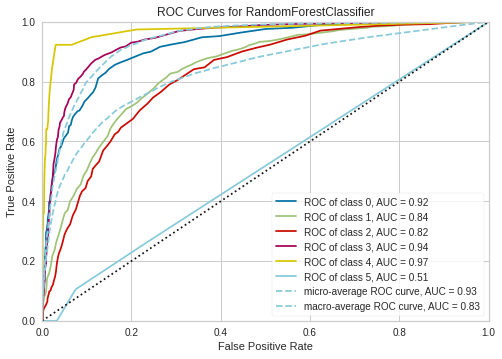

In [30]:
plot_model(rf)

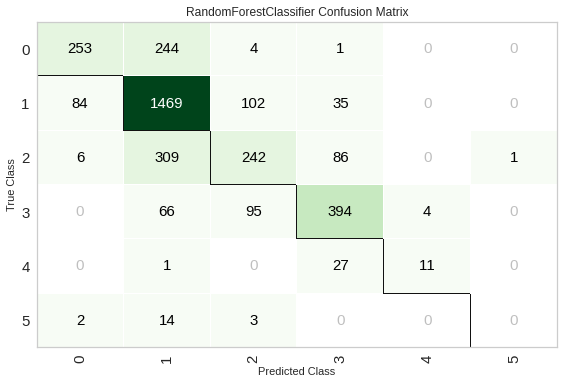

In [31]:
plot_model(rf, plot = 'confusion_matrix')

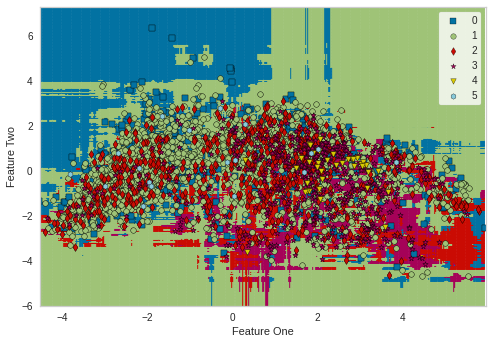

In [32]:
plot_model(rf, plot = 'boundary')

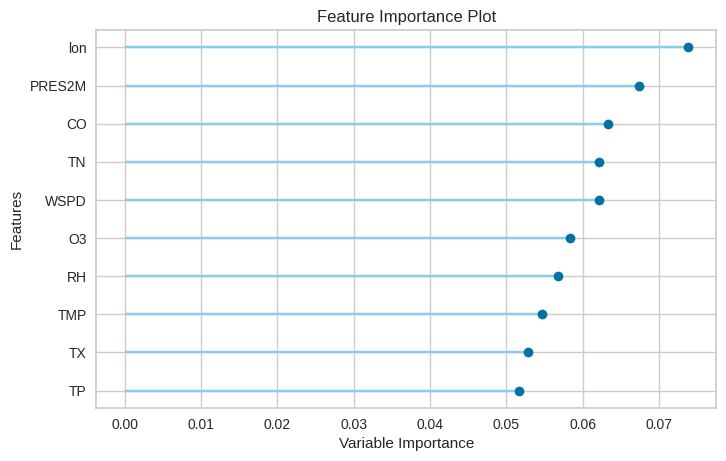

In [33]:
plot_model(rf, plot = 'feature')

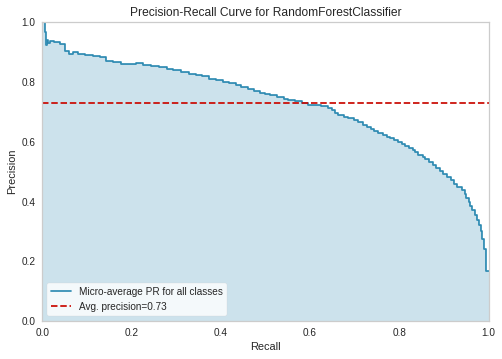

In [34]:
plot_model(rf, plot = 'pr')

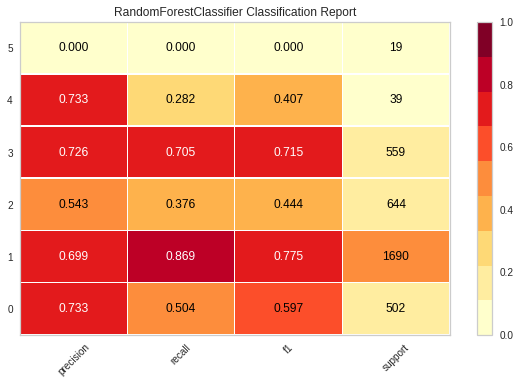

In [35]:
plot_model(rf, plot = 'class_report')

In [ ]:
evaluate_model(rf)

KeyboardInterrupt: 

# 10. Interpret Model

In [ ]:
dt = create_model('rf', cross_validation=False)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5749,0.6873,0.4311,0.5758,0.5752,0.3744,0.3745


In [ ]:
%pip install shape

     |████████████████████████████████| 95.2 MB 1.9 MB/s eta 0:00:01     |████▏                           | 12.3 MB 6.3 MB/s eta 0:00:14     |█████▋                          | 16.6 MB 6.3 MB/s eta 0:00:13██▎                         | 18.6 MB 7.2 MB/s eta 0:00:11███                         | 20.5 MB 7.2 MB/s eta 0:00:11     |███████▊                        | 23.0 MB 7.2 MB/s eta 0:00:11MB/s eta 0:00:13     |███████████▊                    | 34.9 MB 5.0 MB/s eta 0:00:13     |█████████████████▊              | 52.6 MB 3.5 MB/s eta 0:00:13��█████▊          | 64.5 MB 4.1 MB/s eta 0:00:080:08�████████████████▉          | 65.0 MB 4.1 MB/s eta 0:00:08 0:00:08     |██████████████████████████████▉ | 91.6 MB 2.3 MB/s eta 0:00:02     |███████████████████████████████ | 92.4 MB 2.3 MB/s eta 0:00:02     |███████████████████████████████▎| 93.2 MB 2.1 MB/s eta 0:00:01     |███████████████████████████████▊| 94.3 MB 2.1 MB/s eta 0:00:01     |████████████████████████████████| 95.0 MB 2.1 MB/s eta 0:00:01
 

In [ ]:
interpret_model(dt)

ImportError: shap library not found. pip install shap to use interpret_model function.

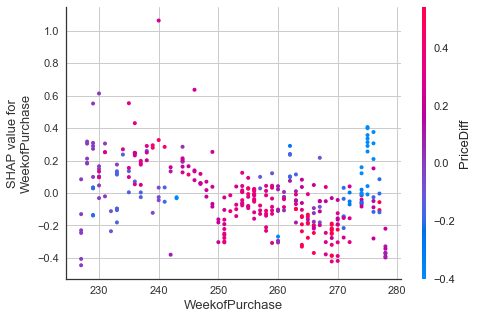

In [ ]:
interpret_model(dt, plot = 'correlation')

In [ ]:
interpret_model(dt, plot = 'reason', observation = 12)

# 11. AutoML()

In [ ]:
best = automl(optimize = 'Recall')
best

LogisticRegression(C=5.5600000000000005, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# 12. Predict Model

In [ ]:
pred_holdouts = predict_model(dt)
pred_holdouts.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8416,0.9048,0.768,0.8136,0.7901,0.6631,0.6638


,WeekofPurchase,PriceCH,PriceMM,DiscCH,DiscMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,PctDiscMM,...,Store7_No,Store7_Yes,STORE_0,STORE_1,STORE_2,STORE_3,STORE_4,Purchase,Label,Score
0,260.0,1.86,2.18,0.0,0.70,0.959305,1.48,1.86,-0.38,0.321101,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.1873
1,229.0,1.69,1.69,0.0,0.00,0.795200,1.69,1.69,0.00,0.000000,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.1914
2,261.0,1.86,2.13,0.0,0.24,0.588965,1.89,1.86,0.03,0.112676,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0,0,0.2532
3,247.0,1.99,2.23,0.0,0.00,0.003689,2.23,1.99,0.24,0.000000,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1,0.9127
4,271.0,1.99,2.09,0.1,0.40,0.973612,1.69,1.89,-0.20,0.191388,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.1895


In [ ]:
new_data = data.copy()
new_data.drop(['AQI_Bucket'], axis=1, inplace=True)
predict_new = predict_model(best, data=new_data)
predict_new.head()

,Id,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE,Label,Score
0,1,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1,0,0.4742
1,2,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1,1,0.5433
2,3,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1,0,0.1670
3,4,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1,1,0.7475
4,5,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0,0,0.0492


# 13. Save / Load Model

In [ ]:
save_model(best, model_name='best-model')

Transformation Pipeline and Model Succesfully Saved


In [ ]:
loaded_bestmodel = load_model('best-model')
print(loaded_bestmodel)

Transformation Pipeline and Model Sucessfully Loaded
[Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Purchase',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                numeric_strategy='mean',
                                target_variable=None)),
                ('new_levels1',
                 New_Catagorical_L...
                ('group', Empty()), ('nonliner', Empty()), ('scaling', Empty()),
                ('P_transform', Empty()), ('pt_target', Empty()),
                ('binn', Empty()), ('rem_outliers', Empty()),
                ('cluster_all', Empty()), ('dummy', Dummify(t

In [ ]:
from sklearn import set_config
set_config(display='diagram')
loaded_bestmodel[0]

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Purchase',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                numeric_strategy='mean',
                                target_variable=None)),
                ('new_levels1',
                 New_Catagorical_L...
                ('group', Empty()), ('nonliner', Empty()), ('scaling', Empty()),
                ('P_transform', Empty()), ('pt_target', Empty()),
                ('binn', Empty()), ('rem_outliers', Empty()),
                ('cluster_all', Empty()), ('dummy', Dummify(target='Purchase')),
                ('fix_perfect', Empty()), ('clean_names', Clean_Colum_Names()),
                ('feature_select', Empty()), ('fix_multi', Empty()),
                ('dfs', Empty()), ('pca', Empty())],
         verbose=False)

In [ ]:
from sklearn import set_config
set_config(display='text')

# 14. Deploy Model

In [ ]:
deploy_model(best, model_name = 'best-aqi', authentication = {'bucket' : 'pycaret-test'})

Model Succesfully Deployed on AWS S3


# 15. Get Config / Set Config

In [ ]:
X_train = get_config('X_train')
X_train.head()

,WeekofPurchase,PriceCH,PriceMM,DiscCH,DiscMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,PctDiscMM,...,SpecialCH_1,SpecialMM_0,SpecialMM_1,Store7_No,Store7_Yes,STORE_0,STORE_1,STORE_2,STORE_3,STORE_4
584,264.0,1.86,2.13,0.37,0.0,0.836160,2.13,1.49,0.64,0.000000,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
751,232.0,1.79,2.09,0.00,0.0,0.400000,2.09,1.79,0.30,0.000000,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
462,228.0,1.69,1.69,0.00,0.0,0.584000,1.69,1.69,0.00,0.000000,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
7,234.0,1.75,1.99,0.00,0.4,0.977746,1.59,1.75,-0.16,0.201005,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
161,269.0,1.99,2.09,0.10,0.0,0.978010,2.09,1.89,0.20,0.000000,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
get_config('seed')

123

In [ ]:
from pycaret.classification import set_config
set_config('seed', 999)

In [ ]:
get_config('seed')

999

In [ ]:
# Lấy danh sách các mô hình đã tạo
all_models = get_config('models')

# Xuất tham số của từng mô hình
for model_name, model_obj in all_models.items():
    print(f"Model: {model_name}")
    print(model_obj.get_params())

# 16. MLFlow UI

In [ ]:
# !mlflow ui --port 5001

# End
Thank you. For more information / tutorials on PyCaret, please visit https://www.pycaret.org